In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 200
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.00114703 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 98.9739% done, 0.0414692 s remaining
time for set_epsilon = 14.9345 s
-----------


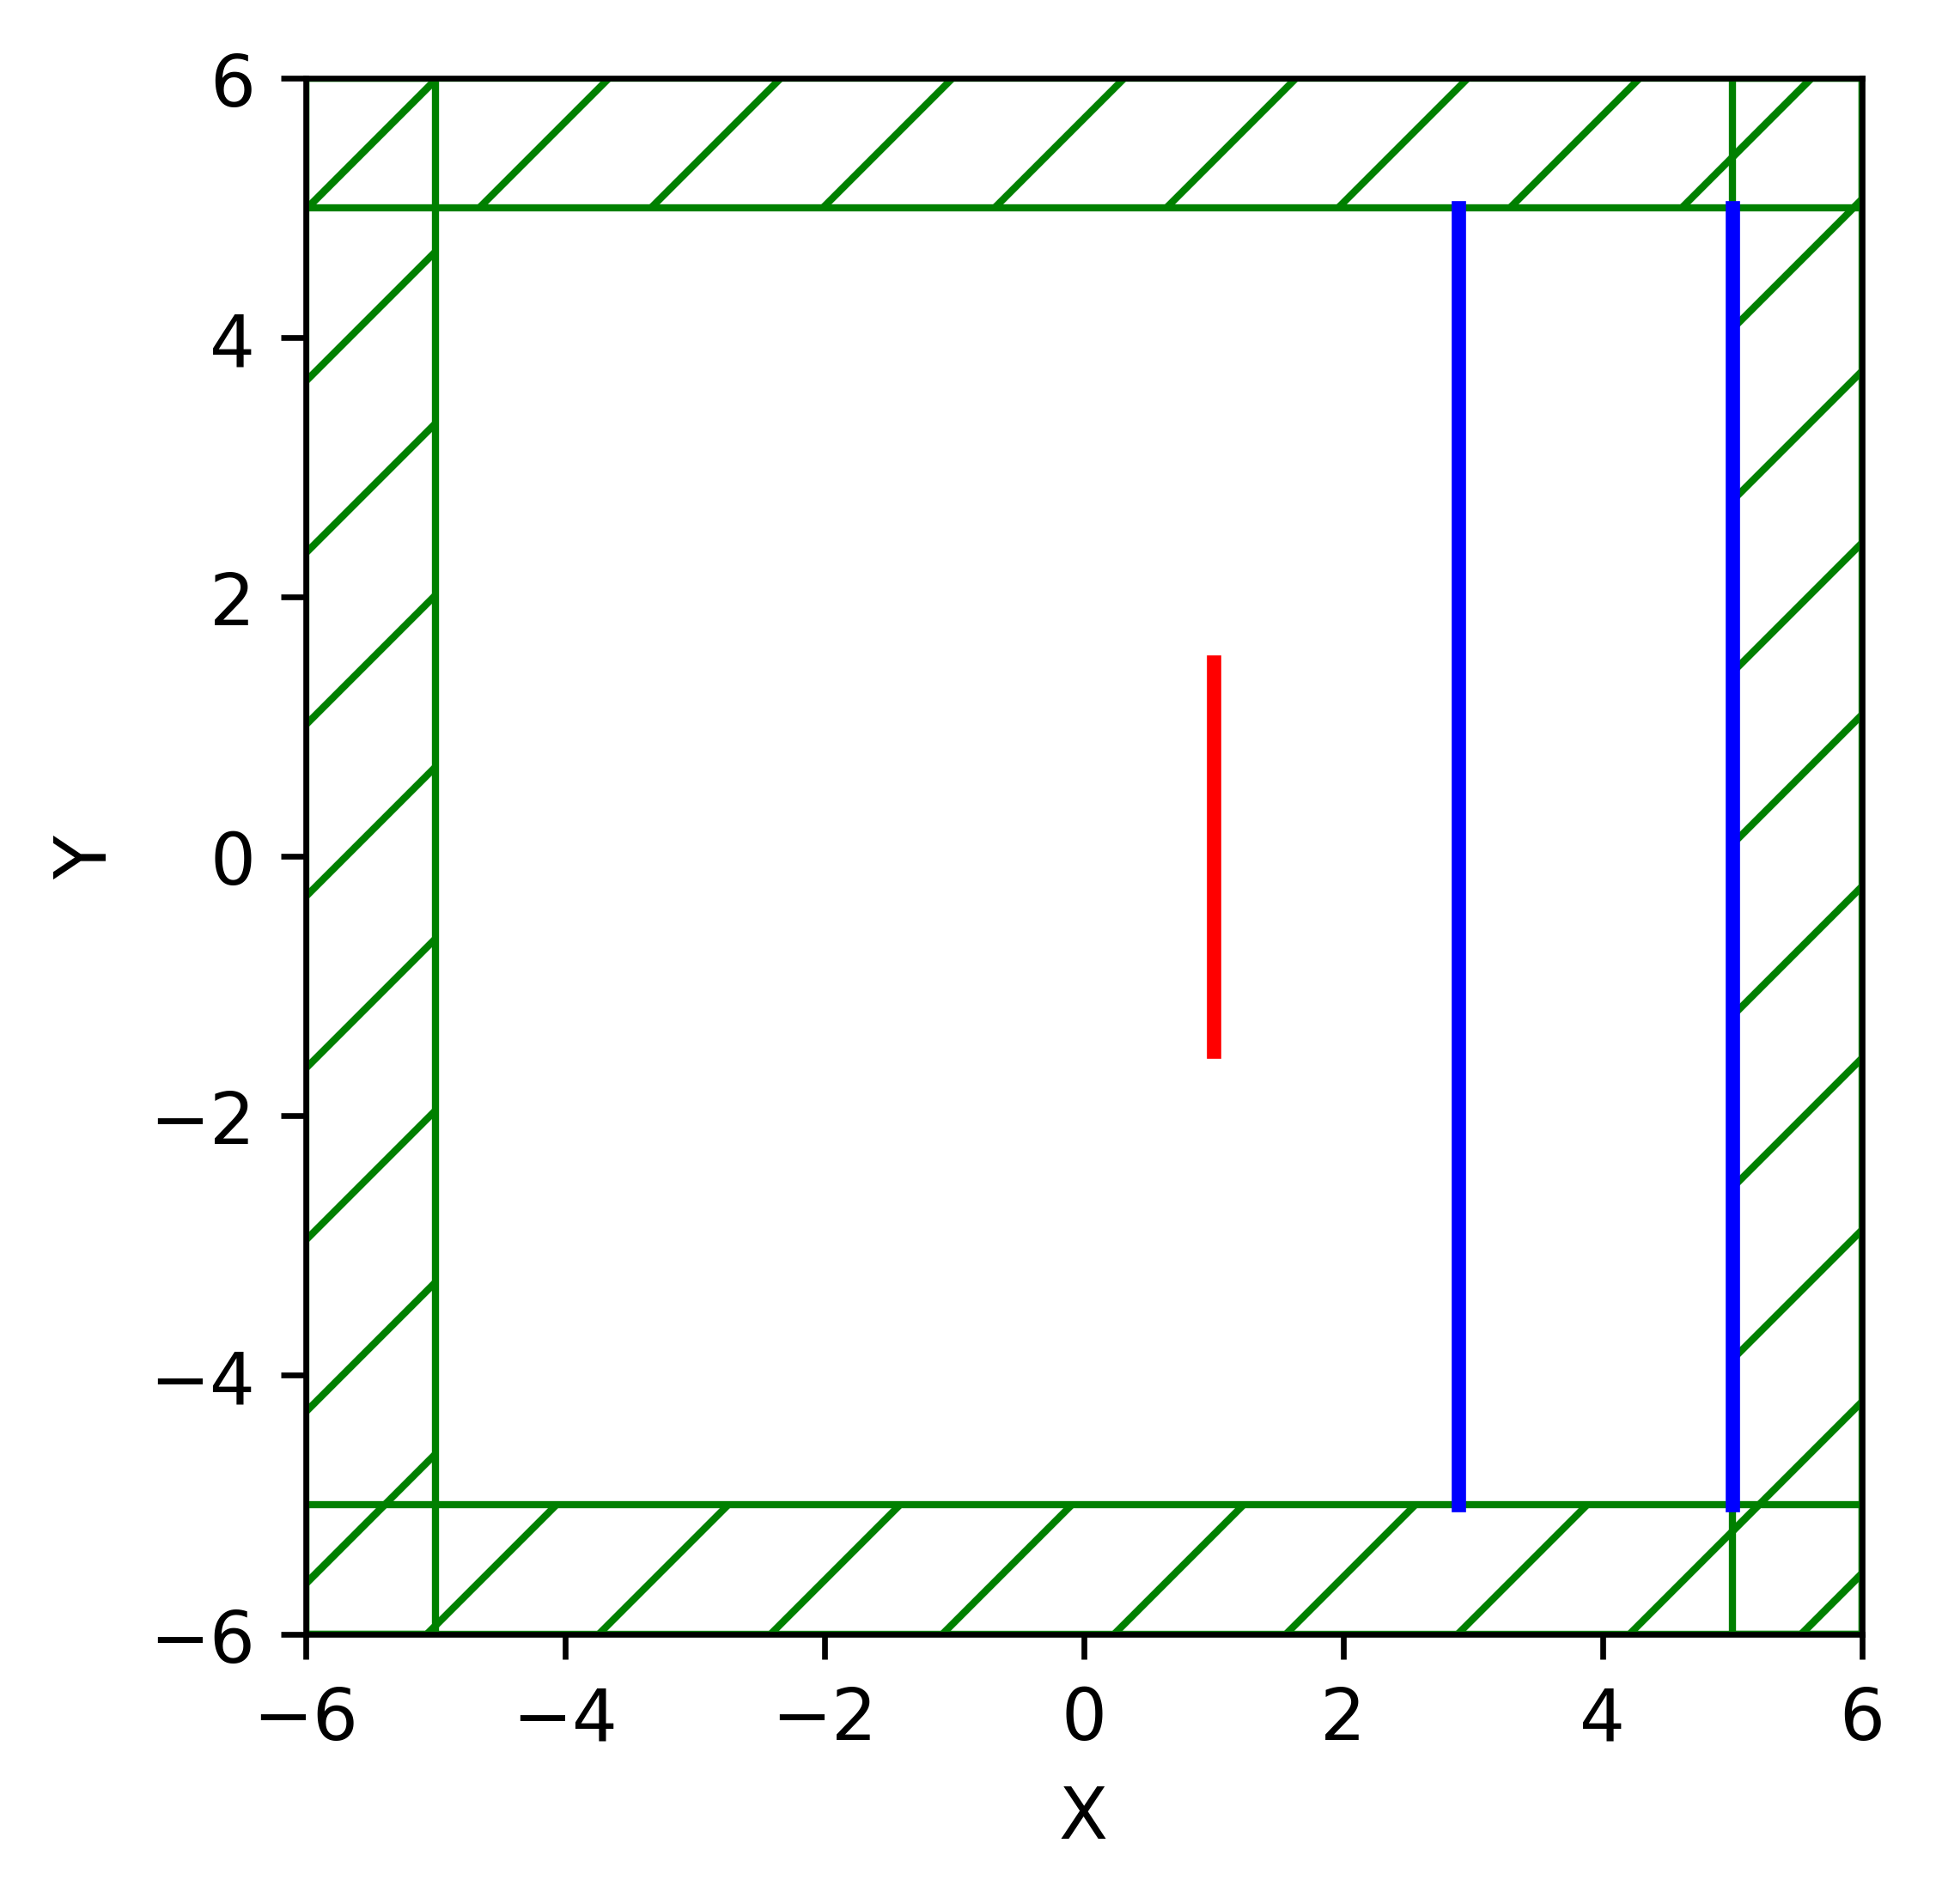

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 14 (time=0.035), 0.296601 s/step
on time step 30 (time=0.075), 0.251981 s/step
on time step 46 (time=0.115), 0.256584 s/step
on time step 62 (time=0.155), 0.253911 s/step
on time step 78 (time=0.195), 0.254959 s/step
on time step 94 (time=0.235), 0.256332 s/step
on time step 110 (time=0.275), 0.257367 s/step
on time step 126 (time=0.315), 0.252331 s/step
on time step 142 (time=0.355), 0.257011 s/step
on time step 158 (time=0.395), 0.257446 s/step
on time step 174 (time=0.435), 0.2576 s/step
on time step 190 (time=0.475), 0.256625 s/step
on time step 206 (time=0.515), 0.257174 s/step
on time step 222 (time=0.555), 0.258695 s/step
on time step 238 (time=0.595), 0.257328 s/step
on time step 254 (time=0.635), 0.257694 s/step
on time step 270 (time=0.675), 0.258036 s/step
on time step 286 (time=0.715), 0.256691 s/step
on time step 302 (time=0.755), 0.262859 s/step
on time step 318 (time=0.795), 0.262321 s/step
on time step 334 (time=

on time step 3078 (time=7.695), 0.258449 s/step
on time step 3094 (time=7.735), 0.25921 s/step
on time step 3110 (time=7.775), 0.260865 s/step
on time step 3126 (time=7.815), 0.260569 s/step
on time step 3142 (time=7.855), 0.261764 s/step
on time step 3158 (time=7.895), 0.259785 s/step
on time step 3174 (time=7.935), 0.262377 s/step
on time step 3190 (time=7.975), 0.260017 s/step
on time step 3206 (time=8.015), 0.260789 s/step
on time step 3222 (time=8.055), 0.264429 s/step
on time step 3238 (time=8.095), 0.266105 s/step
on time step 3254 (time=8.135), 0.262057 s/step
on time step 3270 (time=8.175), 0.262911 s/step
on time step 3286 (time=8.215), 0.264646 s/step
on time step 3302 (time=8.255), 0.264303 s/step
on time step 3318 (time=8.295), 0.260031 s/step
on time step 3334 (time=8.335), 0.260631 s/step
on time step 3350 (time=8.375), 0.256895 s/step
on time step 3366 (time=8.415), 0.258154 s/step
on time step 3382 (time=8.455), 0.260018 s/step
on time step 3398 (time=8.495), 0.259151 

on time step 5739 (time=14.3475), 0.259728 s/step
on time step 5755 (time=14.3875), 0.260015 s/step
on time step 5771 (time=14.4275), 0.264563 s/step
on time step 5787 (time=14.4675), 0.263118 s/step
on time step 5803 (time=14.5075), 0.260314 s/step
on time step 5819 (time=14.5475), 0.260789 s/step
on time step 5835 (time=14.5875), 0.26081 s/step
on time step 5851 (time=14.6275), 0.259285 s/step
on time step 5867 (time=14.6675), 0.253585 s/step
on time step 5883 (time=14.7075), 0.25749 s/step
on time step 5899 (time=14.7475), 0.25855 s/step
on time step 5915 (time=14.7875), 0.258065 s/step
on time step 5931 (time=14.8275), 0.259408 s/step
on time step 5947 (time=14.8675), 0.259981 s/step
on time step 5963 (time=14.9075), 0.259069 s/step
on time step 5979 (time=14.9475), 0.2601 s/step
on time step 5995 (time=14.9875), 0.259767 s/step
on time step 6011 (time=15.0275), 0.268095 s/step
on time step 6027 (time=15.0675), 0.259578 s/step
on time step 6043 (time=15.1075), 0.258974 s/step
on ti

on time step 8410 (time=21.025), 0.267885 s/step
on time step 8425 (time=21.0625), 0.268167 s/step
on time step 8440 (time=21.1), 0.270205 s/step
on time step 8455 (time=21.1375), 0.267533 s/step
on time step 8470 (time=21.175), 0.268188 s/step
on time step 8485 (time=21.2125), 0.268651 s/step
on time step 8500 (time=21.25), 0.268234 s/step
on time step 8515 (time=21.2875), 0.268661 s/step
on time step 8530 (time=21.325), 0.268856 s/step
on time step 8545 (time=21.3625), 0.266712 s/step
on time step 8560 (time=21.4), 0.268473 s/step
on time step 8576 (time=21.44), 0.26587 s/step
on time step 8592 (time=21.48), 0.262075 s/step
on time step 8608 (time=21.52), 0.257646 s/step
on time step 8624 (time=21.56), 0.257933 s/step
on time step 8640 (time=21.6), 0.257979 s/step
on time step 8655 (time=21.6375), 0.272292 s/step
on time step 8671 (time=21.6775), 0.259471 s/step
on time step 8687 (time=21.7175), 0.261846 s/step
on time step 8703 (time=21.7575), 0.260301 s/step
on time step 8719 (time

on time step 11039 (time=27.5975), 0.268337 s/step
on time step 11055 (time=27.6375), 0.265162 s/step
on time step 11071 (time=27.6775), 0.255718 s/step
on time step 11087 (time=27.7175), 0.258564 s/step
on time step 11103 (time=27.7575), 0.260455 s/step
on time step 11119 (time=27.7975), 0.260701 s/step
on time step 11135 (time=27.8375), 0.261038 s/step
on time step 11151 (time=27.8775), 0.259519 s/step
on time step 11167 (time=27.9175), 0.258871 s/step
on time step 11183 (time=27.9575), 0.261865 s/step
on time step 11199 (time=27.9975), 0.259771 s/step
on time step 11215 (time=28.0375), 0.258387 s/step
on time step 11231 (time=28.0775), 0.261764 s/step
on time step 11247 (time=28.1175), 0.26495 s/step
on time step 11263 (time=28.1575), 0.262444 s/step
on time step 11279 (time=28.1975), 0.262415 s/step
on time step 11295 (time=28.2375), 0.256546 s/step
on time step 11311 (time=28.2775), 0.26111 s/step
on time step 11327 (time=28.3175), 0.261898 s/step
on time step 11343 (time=28.3575)

on time step 13642 (time=34.105), 0.260951 s/step
on time step 13658 (time=34.145), 0.260137 s/step
on time step 13674 (time=34.185), 0.262397 s/step
on time step 13689 (time=34.2225), 0.274759 s/step
on time step 13705 (time=34.2625), 0.263166 s/step
on time step 13721 (time=34.3025), 0.263278 s/step
on time step 13737 (time=34.3425), 0.261983 s/step
on time step 13753 (time=34.3825), 0.262798 s/step
on time step 13768 (time=34.42), 0.269578 s/step
on time step 13784 (time=34.46), 0.262943 s/step
on time step 13800 (time=34.5), 0.262122 s/step
on time step 13816 (time=34.54), 0.263309 s/step
on time step 13831 (time=34.5775), 0.271053 s/step
on time step 13846 (time=34.615), 0.279551 s/step
on time step 13861 (time=34.6525), 0.270111 s/step
on time step 13876 (time=34.69), 0.268853 s/step
on time step 13892 (time=34.73), 0.262345 s/step
on time step 13908 (time=34.77), 0.26173 s/step
on time step 13923 (time=34.8075), 0.268868 s/step
on time step 13939 (time=34.8475), 0.262691 s/step


on time step 16221 (time=40.5525), 0.264082 s/step
on time step 16237 (time=40.5925), 0.262562 s/step
on time step 16253 (time=40.6325), 0.26243 s/step
on time step 16269 (time=40.6725), 0.261867 s/step
on time step 16285 (time=40.7125), 0.262319 s/step
on time step 16300 (time=40.75), 0.266903 s/step
on time step 16316 (time=40.79), 0.262672 s/step
on time step 16332 (time=40.83), 0.264624 s/step
on time step 16348 (time=40.87), 0.263642 s/step
on time step 16364 (time=40.91), 0.263842 s/step
on time step 16380 (time=40.95), 0.264304 s/step
on time step 16396 (time=40.99), 0.262411 s/step
on time step 16412 (time=41.03), 0.258697 s/step
on time step 16428 (time=41.07), 0.262276 s/step
on time step 16444 (time=41.11), 0.263679 s/step
on time step 16460 (time=41.15), 0.261881 s/step
on time step 16475 (time=41.1875), 0.268038 s/step
on time step 16491 (time=41.2275), 0.261334 s/step
on time step 16507 (time=41.2675), 0.263104 s/step
on time step 16523 (time=41.3075), 0.258213 s/step
on 

on time step 18804 (time=47.01), 0.273796 s/step
on time step 18820 (time=47.05), 0.263208 s/step
on time step 18836 (time=47.09), 0.264773 s/step
on time step 18852 (time=47.13), 0.26419 s/step
on time step 18868 (time=47.17), 0.263829 s/step
on time step 18883 (time=47.2075), 0.267678 s/step
on time step 18898 (time=47.245), 0.26896 s/step
on time step 18913 (time=47.2825), 0.26911 s/step
on time step 18928 (time=47.32), 0.270063 s/step
on time step 18944 (time=47.36), 0.265407 s/step
on time step 18960 (time=47.4), 0.26168 s/step
on time step 18976 (time=47.44), 0.260463 s/step
on time step 18992 (time=47.48), 0.263869 s/step
on time step 19008 (time=47.52), 0.260205 s/step
on time step 19024 (time=47.56), 0.261761 s/step
on time step 19040 (time=47.6), 0.259462 s/step
on time step 19056 (time=47.64), 0.260271 s/step
on time step 19072 (time=47.68), 0.259667 s/step
on time step 19088 (time=47.72), 0.257935 s/step
on time step 19104 (time=47.76), 0.261182 s/step
on time step 19120 (t

on time step 21430 (time=53.575), 0.261024 s/step
on time step 21446 (time=53.615), 0.262196 s/step
on time step 21462 (time=53.655), 0.261002 s/step
on time step 21478 (time=53.695), 0.259194 s/step
on time step 21494 (time=53.735), 0.261575 s/step
on time step 21510 (time=53.775), 0.261577 s/step
on time step 21526 (time=53.815), 0.259594 s/step
on time step 21542 (time=53.855), 0.260788 s/step
on time step 21558 (time=53.895), 0.26267 s/step
on time step 21574 (time=53.935), 0.261517 s/step
on time step 21590 (time=53.975), 0.257992 s/step
on time step 21606 (time=54.015), 0.260209 s/step
on time step 21622 (time=54.055), 0.259867 s/step
on time step 21638 (time=54.095), 0.261836 s/step
on time step 21654 (time=54.135), 0.260286 s/step
on time step 21670 (time=54.175), 0.259967 s/step
on time step 21686 (time=54.215), 0.261423 s/step
on time step 21702 (time=54.255), 0.261101 s/step
on time step 21718 (time=54.295), 0.261554 s/step
on time step 21734 (time=54.335), 0.261823 s/step
o

on time step 24019 (time=60.0475), 0.259561 s/step
on time step 24035 (time=60.0875), 0.262376 s/step
on time step 24051 (time=60.1275), 0.262246 s/step
on time step 24067 (time=60.1675), 0.262149 s/step
on time step 24083 (time=60.2075), 0.262269 s/step
on time step 24099 (time=60.2475), 0.260614 s/step
on time step 24115 (time=60.2875), 0.261946 s/step
on time step 24131 (time=60.3275), 0.261819 s/step
on time step 24147 (time=60.3675), 0.262186 s/step
on time step 24163 (time=60.4075), 0.260743 s/step
on time step 24179 (time=60.4475), 0.264584 s/step
on time step 24195 (time=60.4875), 0.261542 s/step
on time step 24211 (time=60.5275), 0.264614 s/step
on time step 24226 (time=60.565), 0.278873 s/step
on time step 24241 (time=60.6025), 0.267155 s/step
on time step 24257 (time=60.6425), 0.26076 s/step
on time step 24273 (time=60.6825), 0.261066 s/step
on time step 24289 (time=60.7225), 0.25906 s/step
on time step 24305 (time=60.7625), 0.261034 s/step
on time step 24321 (time=60.8025),

on time step 26641 (time=66.6025), 0.264583 s/step
on time step 26657 (time=66.6425), 0.265535 s/step
on time step 26672 (time=66.68), 0.266747 s/step
on time step 26688 (time=66.72), 0.26599 s/step
on time step 26704 (time=66.76), 0.265703 s/step
on time step 26720 (time=66.8), 0.264893 s/step
on time step 26736 (time=66.84), 0.264697 s/step
on time step 26752 (time=66.88), 0.266389 s/step
on time step 26767 (time=66.9175), 0.269756 s/step
on time step 26783 (time=66.9575), 0.265524 s/step
on time step 26798 (time=66.995), 0.267502 s/step
on time step 26813 (time=67.0325), 0.266693 s/step
on time step 26828 (time=67.07), 0.270691 s/step
on time step 26843 (time=67.1075), 0.273596 s/step
on time step 26858 (time=67.145), 0.272355 s/step
on time step 26874 (time=67.185), 0.264417 s/step
on time step 26890 (time=67.225), 0.26445 s/step
on time step 26906 (time=67.265), 0.264776 s/step
on time step 26922 (time=67.305), 0.264535 s/step
on time step 26938 (time=67.345), 0.265389 s/step
on t

on time step 29237 (time=73.0925), 0.272969 s/step
on time step 29252 (time=73.13), 0.270544 s/step
on time step 29267 (time=73.1675), 0.272034 s/step
on time step 29282 (time=73.205), 0.272443 s/step
on time step 29297 (time=73.2425), 0.275383 s/step
on time step 29312 (time=73.28), 0.273462 s/step
on time step 29327 (time=73.3175), 0.272349 s/step
on time step 29342 (time=73.355), 0.271387 s/step
on time step 29357 (time=73.3925), 0.272786 s/step
on time step 29372 (time=73.43), 0.271554 s/step
on time step 29388 (time=73.47), 0.265561 s/step
on time step 29403 (time=73.5075), 0.266876 s/step
on time step 29419 (time=73.5475), 0.265301 s/step
on time step 29435 (time=73.5875), 0.264658 s/step
on time step 29451 (time=73.6275), 0.265221 s/step
on time step 29467 (time=73.6675), 0.266037 s/step
on time step 29483 (time=73.7075), 0.265816 s/step
on time step 29498 (time=73.745), 0.280612 s/step
on time step 29512 (time=73.78), 0.288084 s/step
on time step 29527 (time=73.8175), 0.272721 

on time step 31818 (time=79.545), 0.264858 s/step
on time step 31834 (time=79.585), 0.263503 s/step
on time step 31850 (time=79.625), 0.261463 s/step
on time step 31866 (time=79.665), 0.264553 s/step
on time step 31882 (time=79.705), 0.264252 s/step
on time step 31898 (time=79.745), 0.262315 s/step
on time step 31914 (time=79.785), 0.258418 s/step
on time step 31930 (time=79.825), 0.264239 s/step
on time step 31946 (time=79.865), 0.264096 s/step
on time step 31962 (time=79.905), 0.263238 s/step
on time step 31978 (time=79.945), 0.264599 s/step
on time step 31994 (time=79.985), 0.262842 s/step
on time step 32010 (time=80.025), 0.262707 s/step
on time step 32026 (time=80.065), 0.26532 s/step
on time step 32042 (time=80.105), 0.262939 s/step
on time step 32057 (time=80.1425), 0.281179 s/step
on time step 32072 (time=80.18), 0.272074 s/step
on time step 32087 (time=80.2175), 0.26872 s/step
on time step 32102 (time=80.255), 0.266786 s/step
on time step 32118 (time=80.295), 0.264006 s/step
o

on time step 34421 (time=86.0525), 0.261684 s/step
on time step 34437 (time=86.0925), 0.262785 s/step
on time step 34453 (time=86.1325), 0.265701 s/step
on time step 34469 (time=86.1725), 0.2647 s/step
on time step 34485 (time=86.2125), 0.265022 s/step
on time step 34501 (time=86.2525), 0.263796 s/step
on time step 34517 (time=86.2925), 0.263967 s/step
on time step 34533 (time=86.3325), 0.263914 s/step
on time step 34549 (time=86.3725), 0.264508 s/step
on time step 34565 (time=86.4125), 0.262679 s/step
on time step 34581 (time=86.4525), 0.262789 s/step
on time step 34597 (time=86.4925), 0.262236 s/step
on time step 34613 (time=86.5325), 0.262719 s/step
on time step 34629 (time=86.5725), 0.262709 s/step
on time step 34645 (time=86.6125), 0.263489 s/step
on time step 34661 (time=86.6525), 0.263651 s/step
on time step 34677 (time=86.6925), 0.263403 s/step
on time step 34693 (time=86.7325), 0.26264 s/step
on time step 34709 (time=86.7725), 0.263347 s/step
on time step 34725 (time=86.8125),

on time step 37001 (time=92.5025), 0.263039 s/step
on time step 37017 (time=92.5425), 0.263637 s/step
on time step 37033 (time=92.5825), 0.263427 s/step
on time step 37049 (time=92.6225), 0.262648 s/step
on time step 37065 (time=92.6625), 0.263892 s/step
on time step 37081 (time=92.7025), 0.263144 s/step
on time step 37097 (time=92.7425), 0.263546 s/step
on time step 37113 (time=92.7825), 0.264097 s/step
on time step 37129 (time=92.8225), 0.26513 s/step
on time step 37145 (time=92.8625), 0.264424 s/step
on time step 37161 (time=92.9025), 0.264147 s/step
on time step 37177 (time=92.9425), 0.262424 s/step
on time step 37193 (time=92.9825), 0.263052 s/step
on time step 37209 (time=93.0225), 0.264046 s/step
on time step 37225 (time=93.0625), 0.263989 s/step
on time step 37241 (time=93.1025), 0.263212 s/step
on time step 37257 (time=93.1425), 0.264533 s/step
on time step 37273 (time=93.1825), 0.264695 s/step
on time step 37289 (time=93.2225), 0.262359 s/step
on time step 37305 (time=93.2625

on time step 39587 (time=98.9675), 0.271335 s/step
on time step 39602 (time=99.005), 0.270962 s/step
on time step 39617 (time=99.0425), 0.273642 s/step
on time step 39632 (time=99.08), 0.270924 s/step
on time step 39647 (time=99.1175), 0.27271 s/step
on time step 39662 (time=99.155), 0.273427 s/step
on time step 39677 (time=99.1925), 0.272758 s/step
on time step 39692 (time=99.23), 0.272907 s/step
on time step 39707 (time=99.2675), 0.27209 s/step
on time step 39722 (time=99.305), 0.270044 s/step
on time step 39737 (time=99.3425), 0.272581 s/step
on time step 39752 (time=99.38), 0.271089 s/step
on time step 39767 (time=99.4175), 0.271635 s/step
on time step 39782 (time=99.455), 0.271827 s/step
on time step 39797 (time=99.4925), 0.271898 s/step
on time step 39812 (time=99.53), 0.272638 s/step
on time step 39827 (time=99.5675), 0.27732 s/step
on time step 39842 (time=99.605), 0.27374 s/step
on time step 39858 (time=99.645), 0.262897 s/step
on time step 39876 (time=99.69), 0.230917 s/step


In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.75457673e-06, 2.87419445e-06, 2.99875301e-06, 3.12844513e-06,
       3.26347056e-06, 3.40403633e-06, 3.55035698e-06, 3.70265478e-06,
       3.86116003e-06, 4.02611131e-06, 4.19775576e-06, 4.37634938e-06,
       4.56215731e-06, 4.75545409e-06, 4.95652402e-06, 5.16566142e-06,
       5.38317103e-06, 5.60936826e-06, 5.84457964e-06, 6.08914309e-06,
       6.34340834e-06, 6.60773723e-06, 6.88250415e-06, 7.16809645e-06,
       7.46491479e-06, 7.77337365e-06, 8.09390169e-06, 8.42694224e-06,
       8.77295367e-06, 9.13240994e-06, 9.50580104e-06, 9.89363349e-06,
       1.02964309e-05, 1.07147344e-05, 1.11491032e-05, 1.16001154e-05,
       1.20683679e-05, 1.25544775e-05, 1.30590817e-05, 1.35828386e-05,
       1.41264280e-05, 1.46905522e-05, 1.52759361e-05, 1.58833283e-05,
       1.65135016e-05, 1.71672539e-05, 1.78454086e-05, 1.85488158e-05,
       1.92783526e-05, 2.00349241e-05, 2.08194643e-05, 2.16329365e-05,
       2.24763349e-05, 2.33506844e-05, 2.42570426e-05, 2.51965000e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00175214 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,4.675,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,4.05,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,3.425,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,2.8,0)
          radius 0.15
          dielectric constant epsilon diagonal = (1,1,1)
     sphere, center = (3,2.175,0)
          radius 0.15
          dielect

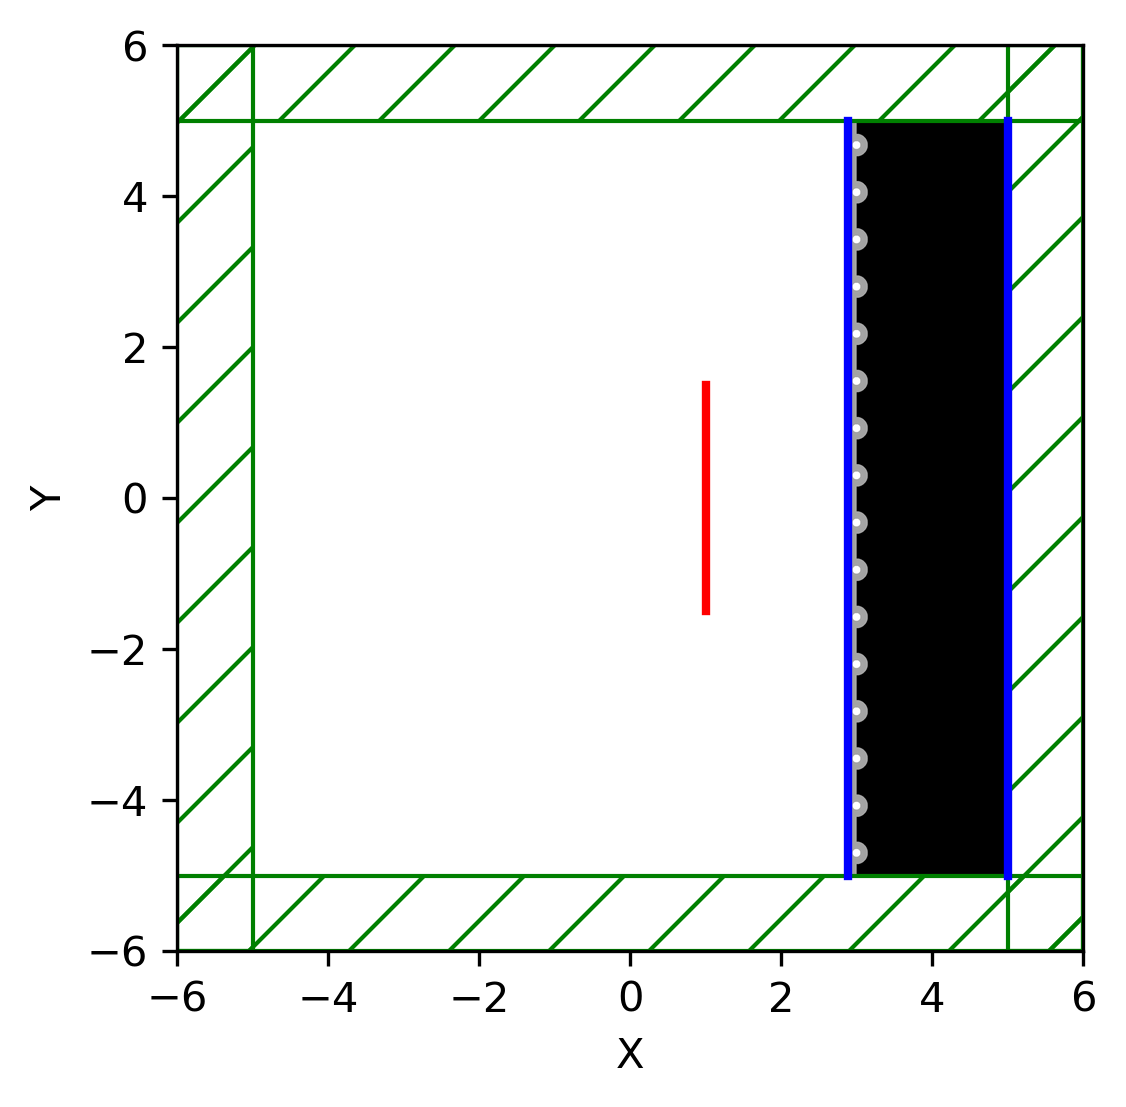

In [8]:
sim.reset_meep()

import math as mh


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*size_y,
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*(size_y),
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )

                        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Sphere(
                            radius = 0.5*(size_y)-T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )

                            

geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                    )
                )

'''
for i in np.arange(N+.5, -.5, -.5):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, -0.5*sy+0.5*size_y+D*i), 
                            material = Si3N4,
                            )
                            )
'''        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...


/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1330: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1334: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 6 (time=0.015), 0.742812 s/step
on time step 13 (time=0.0325), 0.602404 s/step
on time step 20 (time=0.05), 0.601564 s/step
on time step 27 (time=0.0675), 0.601603 s/step
on time step 34 (time=0.085), 0.603787 s/step
on time step 41 (time=0.1025), 0.615983 s/step
on time step 48 (time=0.12), 0.610144 s/step
on time step 55 (time=0.1375), 0.61464 s/step
on time step 62 (time=0.155), 0.613199 s/step
on time step 69 (time=0.1725), 0.614444 s/step
on time step 76 (time=0.19), 0.617939 s/step
on time step 83 (time=0.2075), 0.612976 s/step
on time step 90 (time=0.225), 0.60148 s/step
on time step 97 (time=0.2425), 0.600934 s/step
on time step 104 (time=0.26), 0.600281 s/step
on time step 111 (time=0.2775), 0.601395 s/step
on time step 118 (time=0.295), 0.602427 s/step
on time step 125 (time=0.3125), 0.604412 s/step
on time step 132 (time=0.33), 0.600806 s/step
on time step 139 (time=0.3475), 0.603622 s/step
on time step 146 (time=0.365), 0.613811 s/step
on time step 153 (time=0.

on time step 1221 (time=3.0525), 0.615059 s/step
on time step 1228 (time=3.07), 0.617282 s/step
on time step 1235 (time=3.0875), 0.616984 s/step
on time step 1242 (time=3.105), 0.617894 s/step
on time step 1249 (time=3.1225), 0.614072 s/step
on time step 1256 (time=3.14), 0.612416 s/step
on time step 1263 (time=3.1575), 0.612857 s/step
on time step 1270 (time=3.175), 0.611717 s/step
on time step 1277 (time=3.1925), 0.608425 s/step
on time step 1284 (time=3.21), 0.610548 s/step
on time step 1291 (time=3.2275), 0.610305 s/step
on time step 1298 (time=3.245), 0.63101 s/step
on time step 1305 (time=3.2625), 0.622871 s/step
on time step 1312 (time=3.28), 0.616234 s/step
on time step 1319 (time=3.2975), 0.612574 s/step
on time step 1326 (time=3.315), 0.611574 s/step
on time step 1333 (time=3.3325), 0.611525 s/step
on time step 1340 (time=3.35), 0.611027 s/step
on time step 1347 (time=3.3675), 0.609287 s/step
on time step 1354 (time=3.385), 0.624599 s/step
on time step 1361 (time=3.4025), 0.6

on time step 2418 (time=6.045), 0.608063 s/step
on time step 2425 (time=6.0625), 0.609021 s/step
on time step 2432 (time=6.08), 0.606143 s/step
on time step 2439 (time=6.0975), 0.609916 s/step
on time step 2446 (time=6.115), 0.608166 s/step
on time step 2453 (time=6.1325), 0.606707 s/step
on time step 2460 (time=6.15), 0.60226 s/step
on time step 2467 (time=6.1675), 0.612105 s/step
on time step 2474 (time=6.185), 0.612394 s/step
on time step 2481 (time=6.2025), 0.605223 s/step
on time step 2488 (time=6.22), 0.60368 s/step
on time step 2495 (time=6.2375), 0.602515 s/step
on time step 2502 (time=6.255), 0.599269 s/step
on time step 2509 (time=6.2725), 0.603561 s/step
on time step 2516 (time=6.29), 0.607305 s/step
on time step 2523 (time=6.3075), 0.601337 s/step
on time step 2530 (time=6.325), 0.602535 s/step
on time step 2537 (time=6.3425), 0.599139 s/step
on time step 2544 (time=6.36), 0.600366 s/step
on time step 2551 (time=6.3775), 0.601275 s/step
on time step 2558 (time=6.395), 0.600

on time step 3615 (time=9.0375), 0.599771 s/step
on time step 3622 (time=9.055), 0.607836 s/step
on time step 3629 (time=9.0725), 0.603206 s/step
on time step 3636 (time=9.09), 0.60254 s/step
on time step 3643 (time=9.1075), 0.603571 s/step
on time step 3650 (time=9.125), 0.601254 s/step
on time step 3657 (time=9.1425), 0.600418 s/step
on time step 3664 (time=9.16), 0.603688 s/step
on time step 3671 (time=9.1775), 0.604261 s/step
on time step 3678 (time=9.195), 0.601377 s/step
on time step 3685 (time=9.2125), 0.602295 s/step
on time step 3692 (time=9.23), 0.601801 s/step
on time step 3699 (time=9.2475), 0.604969 s/step
on time step 3706 (time=9.265), 0.603255 s/step
on time step 3713 (time=9.2825), 0.602924 s/step
on time step 3720 (time=9.3), 0.604124 s/step
on time step 3727 (time=9.3175), 0.59989 s/step
on time step 3734 (time=9.335), 0.603151 s/step
on time step 3741 (time=9.3525), 0.599891 s/step
on time step 3748 (time=9.37), 0.604428 s/step
on time step 3755 (time=9.3875), 0.604

on time step 4791 (time=11.9775), 0.599049 s/step
on time step 4798 (time=11.995), 0.602829 s/step
on time step 4805 (time=12.0125), 0.600766 s/step
on time step 4812 (time=12.03), 0.604021 s/step
on time step 4819 (time=12.0475), 0.612179 s/step
on time step 4826 (time=12.065), 0.603958 s/step
on time step 4833 (time=12.0825), 0.604784 s/step
on time step 4840 (time=12.1), 0.602981 s/step
on time step 4847 (time=12.1175), 0.602313 s/step
on time step 4854 (time=12.135), 0.60298 s/step
on time step 4862 (time=12.155), 0.533083 s/step
on time step 4871 (time=12.1775), 0.498925 s/step
on time step 4879 (time=12.1975), 0.503771 s/step
on time step 4887 (time=12.2175), 0.500338 s/step
on time step 4895 (time=12.2375), 0.501863 s/step
on time step 4903 (time=12.2575), 0.511006 s/step
on time step 4912 (time=12.28), 0.500064 s/step
on time step 4920 (time=12.3), 0.506422 s/step
on time step 4928 (time=12.32), 0.510793 s/step
on time step 4936 (time=12.34), 0.500986 s/step
on time step 4945 (

on time step 6191 (time=15.4775), 0.498513 s/step
on time step 6200 (time=15.5), 0.496153 s/step
on time step 6209 (time=15.5225), 0.498328 s/step
on time step 6218 (time=15.545), 0.494939 s/step
on time step 6227 (time=15.5675), 0.498204 s/step
on time step 6236 (time=15.59), 0.495711 s/step
on time step 6245 (time=15.6125), 0.499188 s/step
on time step 6254 (time=15.635), 0.492718 s/step
on time step 6263 (time=15.6575), 0.490822 s/step
on time step 6272 (time=15.68), 0.496388 s/step
on time step 6280 (time=15.7), 0.501172 s/step
on time step 6288 (time=15.72), 0.502811 s/step
on time step 6296 (time=15.74), 0.504084 s/step
on time step 6304 (time=15.76), 0.500267 s/step
on time step 6313 (time=15.7825), 0.49975 s/step
on time step 6322 (time=15.805), 0.49457 s/step
on time step 6331 (time=15.8275), 0.491893 s/step
on time step 6340 (time=15.85), 0.497171 s/step
on time step 6349 (time=15.8725), 0.491073 s/step
on time step 6358 (time=15.895), 0.495617 s/step
on time step 6367 (time=

on time step 7629 (time=19.0725), 0.501379 s/step
on time step 7637 (time=19.0925), 0.501318 s/step
on time step 7646 (time=19.115), 0.496451 s/step
on time step 7655 (time=19.1375), 0.490437 s/step
on time step 7664 (time=19.16), 0.498725 s/step
on time step 7673 (time=19.1825), 0.495492 s/step
on time step 7682 (time=19.205), 0.499281 s/step
on time step 7691 (time=19.2275), 0.492037 s/step
on time step 7700 (time=19.25), 0.496863 s/step
on time step 7709 (time=19.2725), 0.490491 s/step
on time step 7718 (time=19.295), 0.49919 s/step
on time step 7727 (time=19.3175), 0.495319 s/step
on time step 7735 (time=19.3375), 0.501877 s/step
on time step 7744 (time=19.36), 0.49908 s/step
on time step 7753 (time=19.3825), 0.500182 s/step
on time step 7761 (time=19.4025), 0.50168 s/step
on time step 7769 (time=19.4225), 0.501661 s/step
on time step 7778 (time=19.445), 0.496463 s/step
on time step 7787 (time=19.4675), 0.494283 s/step
on time step 7796 (time=19.49), 0.499657 s/step
on time step 78

on time step 9008 (time=22.52), 0.508055 s/step
on time step 9016 (time=22.54), 0.50422 s/step
on time step 9025 (time=22.5625), 0.499243 s/step
on time step 9033 (time=22.5825), 0.501566 s/step
on time step 9041 (time=22.6025), 0.501186 s/step
on time step 9049 (time=22.6225), 0.506089 s/step
on time step 9057 (time=22.6425), 0.502567 s/step
on time step 9065 (time=22.6625), 0.504 s/step
on time step 9073 (time=22.6825), 0.503724 s/step
on time step 9081 (time=22.7025), 0.50356 s/step
on time step 9089 (time=22.7225), 0.501961 s/step
on time step 9097 (time=22.7425), 0.501937 s/step
on time step 9105 (time=22.7625), 0.501534 s/step
on time step 9113 (time=22.7825), 0.502121 s/step
on time step 9121 (time=22.8025), 0.503431 s/step
on time step 9129 (time=22.8225), 0.500355 s/step
on time step 9137 (time=22.8425), 0.503711 s/step
on time step 9145 (time=22.8625), 0.50615 s/step
on time step 9153 (time=22.8825), 0.506273 s/step
on time step 9161 (time=22.9025), 0.50342 s/step
on time ste

on time step 10391 (time=25.9775), 0.501392 s/step
on time step 10400 (time=26), 0.502079 s/step
on time step 10408 (time=26.02), 0.528429 s/step
on time step 10416 (time=26.04), 0.508932 s/step
on time step 10424 (time=26.06), 0.507846 s/step
on time step 10432 (time=26.08), 0.501842 s/step
on time step 10440 (time=26.1), 0.501033 s/step
on time step 10448 (time=26.12), 0.507182 s/step
on time step 10457 (time=26.1425), 0.496499 s/step
on time step 10466 (time=26.165), 0.495169 s/step
on time step 10475 (time=26.1875), 0.496346 s/step
on time step 10484 (time=26.21), 0.492394 s/step
on time step 10493 (time=26.2325), 0.497022 s/step
on time step 10501 (time=26.2525), 0.502137 s/step
on time step 10509 (time=26.2725), 0.501968 s/step
on time step 10517 (time=26.2925), 0.518006 s/step
on time step 10525 (time=26.3125), 0.506148 s/step
on time step 10533 (time=26.3325), 0.521151 s/step
on time step 10542 (time=26.355), 0.499165 s/step
on time step 10550 (time=26.375), 0.515944 s/step
on 

on time step 11755 (time=29.3875), 0.502717 s/step
on time step 11763 (time=29.4075), 0.505869 s/step
on time step 11772 (time=29.43), 0.493756 s/step
on time step 11780 (time=29.45), 0.50061 s/step
on time step 11789 (time=29.4725), 0.499182 s/step
on time step 11798 (time=29.495), 0.499554 s/step
on time step 11807 (time=29.5175), 0.498047 s/step
on time step 11816 (time=29.54), 0.500105 s/step
on time step 11825 (time=29.5625), 0.493081 s/step
on time step 11834 (time=29.585), 0.498485 s/step
on time step 11843 (time=29.6075), 0.498248 s/step
on time step 11851 (time=29.6275), 0.50187 s/step
on time step 11859 (time=29.6475), 0.505297 s/step
on time step 11868 (time=29.67), 0.495558 s/step
on time step 11877 (time=29.6925), 0.496689 s/step
on time step 11886 (time=29.715), 0.500407 s/step
on time step 11895 (time=29.7375), 0.497721 s/step
on time step 11904 (time=29.76), 0.490407 s/step
on time step 11913 (time=29.7825), 0.491859 s/step
on time step 11922 (time=29.805), 0.499608 s/s

on time step 13143 (time=32.8575), 0.500957 s/step
on time step 13152 (time=32.88), 0.499181 s/step
on time step 13160 (time=32.9), 0.506623 s/step
on time step 13168 (time=32.92), 0.502166 s/step
on time step 13176 (time=32.94), 0.517587 s/step
on time step 13184 (time=32.96), 0.508284 s/step
on time step 13192 (time=32.98), 0.50045 s/step
on time step 13200 (time=33), 0.529522 s/step
on time step 13208 (time=33.02), 0.502797 s/step
on time step 13216 (time=33.04), 0.501001 s/step
on time step 13224 (time=33.06), 0.513164 s/step
on time step 13232 (time=33.08), 0.501001 s/step
on time step 13240 (time=33.1), 0.502817 s/step
on time step 13248 (time=33.12), 0.501023 s/step
on time step 13256 (time=33.14), 0.503241 s/step
on time step 13264 (time=33.16), 0.509997 s/step
on time step 13273 (time=33.1825), 0.489012 s/step
on time step 13281 (time=33.2025), 0.500296 s/step
on time step 13290 (time=33.225), 0.494695 s/step
on time step 13299 (time=33.2475), 0.496161 s/step
on time step 1330

on time step 14523 (time=36.3075), 0.502813 s/step
on time step 14531 (time=36.3275), 0.501063 s/step
on time step 14539 (time=36.3475), 0.500123 s/step
on time step 14548 (time=36.37), 0.499759 s/step
on time step 14556 (time=36.39), 0.500915 s/step
on time step 14565 (time=36.4125), 0.499349 s/step
on time step 14574 (time=36.435), 0.497775 s/step
on time step 14583 (time=36.4575), 0.493703 s/step
on time step 14592 (time=36.48), 0.495726 s/step
on time step 14601 (time=36.5025), 0.494739 s/step
on time step 14610 (time=36.525), 0.496222 s/step
on time step 14618 (time=36.545), 0.500437 s/step
on time step 14627 (time=36.5675), 0.499326 s/step
on time step 14636 (time=36.59), 0.497439 s/step
on time step 14644 (time=36.61), 0.531864 s/step
on time step 14652 (time=36.63), 0.512277 s/step
on time step 14660 (time=36.65), 0.522026 s/step
on time step 14668 (time=36.67), 0.504108 s/step
on time step 14676 (time=36.69), 0.531736 s/step
on time step 14684 (time=36.71), 0.506502 s/step
on 

on time step 15897 (time=39.7425), 0.501199 s/step
on time step 15905 (time=39.7625), 0.500166 s/step
on time step 15914 (time=39.785), 0.497703 s/step
on time step 15923 (time=39.8075), 0.500191 s/step
on time step 15932 (time=39.83), 0.499011 s/step
on time step 15941 (time=39.8525), 0.498841 s/step
on time step 15950 (time=39.875), 0.498244 s/step
on time step 15959 (time=39.8975), 0.498568 s/step
on time step 15968 (time=39.92), 0.498384 s/step
on time step 15976 (time=39.94), 0.501148 s/step
on time step 15984 (time=39.96), 0.501217 s/step
on time step 15992 (time=39.98), 0.501795 s/step
on time step 16001 (time=40.0025), 0.490263 s/step
field decay(t = 40.005): 9.132434616445544e-05 / 0.002432305519733088 = 0.03754641241552461
on time step 16009 (time=40.0225), 0.500259 s/step
on time step 16017 (time=40.0425), 0.501536 s/step
on time step 16025 (time=40.0625), 0.502319 s/step
on time step 16033 (time=40.0825), 0.501867 s/step
on time step 16041 (time=40.1025), 0.501339 s/step
on

on time step 17270 (time=43.175), 0.502078 s/step
on time step 17278 (time=43.195), 0.500952 s/step
on time step 17287 (time=43.2175), 0.499004 s/step
on time step 17295 (time=43.2375), 0.530038 s/step
on time step 17304 (time=43.26), 0.489601 s/step
on time step 17312 (time=43.28), 0.505897 s/step
on time step 17321 (time=43.3025), 0.495461 s/step
on time step 17330 (time=43.325), 0.498608 s/step
on time step 17339 (time=43.3475), 0.496821 s/step
on time step 17348 (time=43.37), 0.499411 s/step
on time step 17356 (time=43.39), 0.501853 s/step
on time step 17364 (time=43.41), 0.502662 s/step
on time step 17372 (time=43.43), 0.500987 s/step
on time step 17380 (time=43.45), 0.517287 s/step
on time step 17388 (time=43.47), 0.517453 s/step
on time step 17396 (time=43.49), 0.520438 s/step
on time step 17404 (time=43.51), 0.517236 s/step
on time step 17412 (time=43.53), 0.508189 s/step
on time step 17420 (time=43.55), 0.502747 s/step
on time step 17428 (time=43.57), 0.504085 s/step
on time s

on time step 18650 (time=46.625), 0.496098 s/step
on time step 18659 (time=46.6475), 0.496646 s/step
on time step 18668 (time=46.67), 0.496523 s/step
on time step 18677 (time=46.6925), 0.495951 s/step
on time step 18686 (time=46.715), 0.494525 s/step
on time step 18695 (time=46.7375), 0.496064 s/step
on time step 18704 (time=46.76), 0.493937 s/step
on time step 18713 (time=46.7825), 0.496691 s/step
on time step 18722 (time=46.805), 0.497965 s/step
on time step 18731 (time=46.8275), 0.500232 s/step
on time step 18740 (time=46.85), 0.499576 s/step
on time step 18748 (time=46.87), 0.500634 s/step
on time step 18757 (time=46.8925), 0.499354 s/step
on time step 18765 (time=46.9125), 0.500721 s/step
on time step 18774 (time=46.935), 0.497928 s/step
on time step 18782 (time=46.955), 0.505924 s/step
on time step 18790 (time=46.975), 0.504129 s/step
on time step 18798 (time=46.995), 0.502836 s/step
on time step 18806 (time=47.015), 0.501569 s/step
on time step 18814 (time=47.035), 0.50061 s/ste

on time step 20013 (time=50.0325), 0.502596 s/step
on time step 20022 (time=50.055), 0.499797 s/step
on time step 20030 (time=50.075), 0.501596 s/step
on time step 20039 (time=50.0975), 0.497445 s/step
on time step 20047 (time=50.1175), 0.502501 s/step
on time step 20055 (time=50.1375), 0.504287 s/step
on time step 20064 (time=50.16), 0.499186 s/step
on time step 20072 (time=50.18), 0.50278 s/step
on time step 20080 (time=50.2), 0.502847 s/step
on time step 20088 (time=50.22), 0.503595 s/step
on time step 20096 (time=50.24), 0.501494 s/step
on time step 20105 (time=50.2625), 0.497719 s/step
on time step 20113 (time=50.2825), 0.502722 s/step
on time step 20122 (time=50.305), 0.493047 s/step
on time step 20131 (time=50.3275), 0.499474 s/step
on time step 20140 (time=50.35), 0.497515 s/step
on time step 20149 (time=50.3725), 0.493921 s/step
on time step 20157 (time=50.3925), 0.513536 s/step
on time step 20166 (time=50.415), 0.496671 s/step
on time step 20175 (time=50.4375), 0.495513 s/ste

on time step 21362 (time=53.405), 0.504643 s/step
on time step 21370 (time=53.425), 0.50352 s/step
on time step 21378 (time=53.445), 0.504151 s/step
on time step 21386 (time=53.465), 0.503344 s/step
on time step 21394 (time=53.485), 0.500655 s/step
on time step 21402 (time=53.505), 0.502696 s/step
on time step 21410 (time=53.525), 0.509236 s/step
on time step 21418 (time=53.545), 0.513162 s/step
on time step 21426 (time=53.565), 0.515419 s/step
on time step 21434 (time=53.585), 0.513877 s/step
on time step 21442 (time=53.605), 0.506858 s/step
on time step 21450 (time=53.625), 0.50459 s/step
on time step 21458 (time=53.645), 0.515472 s/step
on time step 21466 (time=53.665), 0.50312 s/step
on time step 21474 (time=53.685), 0.500726 s/step
on time step 21483 (time=53.7075), 0.497293 s/step
on time step 21491 (time=53.7275), 0.500975 s/step
on time step 21499 (time=53.7475), 0.510076 s/step
on time step 21507 (time=53.7675), 0.502794 s/step
on time step 21515 (time=53.7875), 0.500836 s/ste

on time step 22857 (time=57.1425), 0.389398 s/step
on time step 22868 (time=57.17), 0.393024 s/step
on time step 22879 (time=57.1975), 0.393537 s/step
on time step 22890 (time=57.225), 0.397999 s/step
on time step 22901 (time=57.2525), 0.398432 s/step
on time step 22912 (time=57.28), 0.39836 s/step
on time step 22923 (time=57.3075), 0.398354 s/step
on time step 22934 (time=57.335), 0.399569 s/step
on time step 22945 (time=57.3625), 0.397941 s/step
on time step 22956 (time=57.39), 0.396726 s/step
on time step 22967 (time=57.4175), 0.396684 s/step
on time step 22978 (time=57.445), 0.394744 s/step
on time step 22989 (time=57.4725), 0.398372 s/step
on time step 23000 (time=57.5), 0.399132 s/step
on time step 23011 (time=57.5275), 0.3955 s/step
on time step 23022 (time=57.555), 0.395677 s/step
on time step 23033 (time=57.5825), 0.392882 s/step
on time step 23044 (time=57.61), 0.392911 s/step
on time step 23055 (time=57.6375), 0.39457 s/step
on time step 23066 (time=57.665), 0.39068 s/step
o

on time step 25008 (time=62.52), 0.299607 s/step
on time step 25022 (time=62.555), 0.299939 s/step
on time step 25035 (time=62.5875), 0.309608 s/step
on time step 25049 (time=62.6225), 0.304468 s/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
no_ARC_refl_data

FluxData(E=array([-1.59604744e-07-3.30370229e-08j, -1.57296766e-07-4.52481920e-08j,
       -1.53997651e-07-5.72423403e-08j, ...,
       -9.89232324e-09+3.62321424e-09j, -9.50323539e-09+3.27278957e-09j,
       -9.14547740e-09+2.98603921e-09j]), H=array([-2.83306602e-05+2.59780238e-06j, -2.87082639e-05+6.05843062e-07j,
       -2.89417408e-05-1.41840116e-06j, ...,
       -2.36060395e-05+1.67063931e-05j, -2.38495518e-05+1.51024493e-05j,
       -2.40202580e-05+1.35430004e-05j]))

In [11]:
no_ARC_refl_flux

[1.3947036106871397e-06,
 1.4551625275857307e-06,
 1.5181104100543742e-06,
 1.583643889611706e-06,
 1.6518631113059326e-06,
 1.7228718512270717e-06,
 1.7967776334580921e-06,
 1.8736918496473523e-06,
 1.9537298853287436e-06,
 2.0370112550200226e-06,
 2.123659744467376e-06,
 2.2138035559012453e-06,
 2.307575452797417e-06,
 2.4051129040518662e-06,
 2.5065582311955986e-06,
 2.6120587634692393e-06,
 2.7217670032241344e-06,
 2.835840799868506e-06,
 2.954443527578043e-06,
 3.0777442626296483e-06,
 3.2059179601096954e-06,
 3.3391456341172477e-06,
 3.477614547076048e-06,
 3.6215184111386482e-06,
 3.771057599743657e-06,
 3.926439363830403e-06,
 4.087878047809838e-06,
 4.255595304852131e-06,
 4.429820316148403e-06,
 4.610790020668369e-06,
 4.798749359004539e-06,
 4.993951529212068e-06,
 5.196658248332346e-06,
 5.4071400138276914e-06,
 5.625676364232184e-06,
 5.8525561442671955e-06,
 6.088077781973778e-06,
 6.33254958216658e-06,
 6.5862900339704885e-06,
 6.849628125212285e-06,
 7.122903656883922e-

In [12]:
with_ARC_refl_flux

[-4.057255220967124e-07,
 -3.666840428328585e-07,
 -3.1557804438103213e-07,
 -2.6169528428922746e-07,
 -2.1398559881221316e-07,
 -1.7815285555926425e-07,
 -1.5512461080069648e-07,
 -1.4148515828687573e-07,
 -1.3163750124725074e-07,
 -1.207404108282075e-07,
 -1.0716033248292825e-07,
 -9.341725003789857e-08,
 -8.528068899950948e-08,
 -8.948440750583254e-08,
 -1.1111420437409181e-07,
 -1.51824883382381e-07,
 -2.0962304782404186e-07,
 -2.802127870124662e-07,
 -3.5918661026538957e-07,
 -4.4398358350186094e-07,
 -5.346909939651775e-07,
 -6.333522376864506e-07,
 -7.421761762592692e-07,
 -8.615696113348833e-07,
 -9.889845271251951e-07,
 -1.1191573717544684e-06,
 -1.2456265575763092e-06,
 -1.3627887703735208e-06,
 -1.467503547793042e-06,
 -1.5595014533103661e-06,
 -1.6404674564079208e-06,
 -1.71234295092697e-06,
 -1.7757709050544312e-06,
 -1.829497995875835e-06,
 -1.8709975116823836e-06,
 -1.8978742669187247e-06,
 -1.909138519964114e-06,
 -1.905467576477175e-06,
 -1.8881315471299829e-06,
 -1.85

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('sphere_with_ARC.csv')

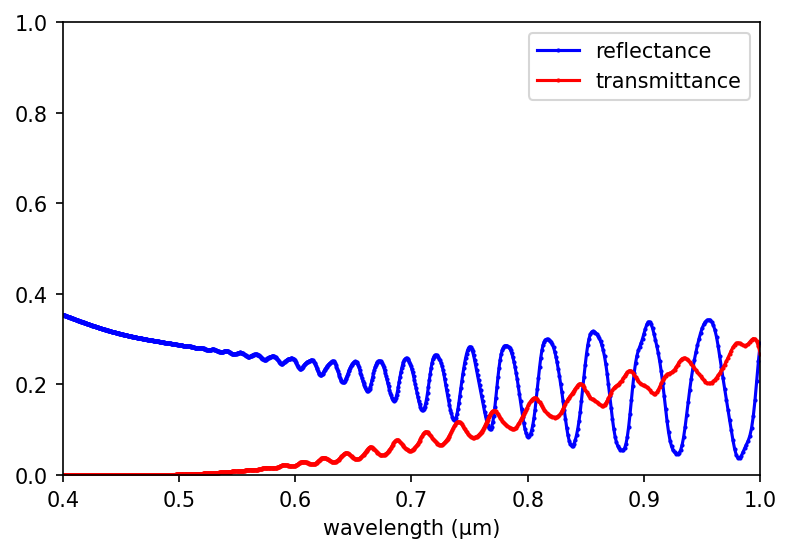

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()